In [1]:
import pandas as pd

In [18]:
solar_data = pd.read_csv('data/solarpower.csv')
solar_data.head()

,date,cum_power
0,2017-01-01,20111.0
1,2017-01-02,20112.0
2,2017-01-03,20115.0
3,2017-01-04,20117.0
4,2017-01-05,20119.0


In [19]:
solar_data[solar_data['cum_power'] == -1]

,date,cum_power
45,2017-02-15,-1.0
647,2018-10-10,-1.0


In [21]:
for i, j in enumerate(solar_data['cum_power']):
    if j == -1:
        solar_data['cum_power'][i] = (solar_data['cum_power'][i-1]+solar_data['cum_power'][i+1])/2

C:\Users\medol\AppData\Local\Temp\ipykernel_13600\2587441100.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar_data['cum_power'][i] = (solar_data['cum_power'][i-1]+solar_data['cum_power'][i+1])/2


In [26]:
round(solar_data['cum_power'].mean(),0)

23848.0

In [31]:
solar_data['day_power'] = solar_data['cum_power'].diff()

In [33]:
solar_data['day_power'][0] = 0

C:\Users\medol\AppData\Local\Temp\ipykernel_13600\74684599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar_data['day_power'][0] = 0


In [34]:
solar_data.head()

,date,cum_power,shift,day_power
0,2017-01-01,20111.0,0.0,0.0
1,2017-01-02,20112.0,20111.0,1.0
2,2017-01-03,20115.0,20112.0,3.0
3,2017-01-04,20117.0,20115.0,2.0
4,2017-01-05,20119.0,20117.0,2.0


In [36]:
solar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       664 non-null    object 
 1   cum_power  664 non-null    float64
 2   shift      664 non-null    float64
 3   day_power  664 non-null    float64
dtypes: float64(3), object(1)
memory usage: 20.9+ KB


In [37]:
import datetime as dt

In [39]:
solar_data['date'] = pd.to_datetime(solar_data['date'])

In [40]:
solar_data['month'] = solar_data['date'].dt.to_period('M')

In [41]:
solar_data['year'] = solar_data['date'].dt.to_period('Y')

In [48]:
round(solar_data.groupby('month', as_index=False)['day_power'].mean(),0)

,month,day_power
0,2017-01,3.0
1,2017-02,4.0
2,2017-03,11.0
3,2017-04,16.0
4,2017-05,19.0
5,2017-06,22.0
6,2017-07,18.0
7,2017-08,15.0
8,2017-09,12.0
9,2017-10,6.0


In [45]:
import plotly
import plotly.express as px

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
line_data = round(solar_data.groupby('month', as_index=False)['day_power'].mean(),0)

fig = px.line(
    data_frame= line_data,
    x= 'month',
    y = 'day_power'
)

fig.show()

TypeError: Object of type Period is not JSON serializable

TypeError: float() argument must be a string or a real number, not 'Period'

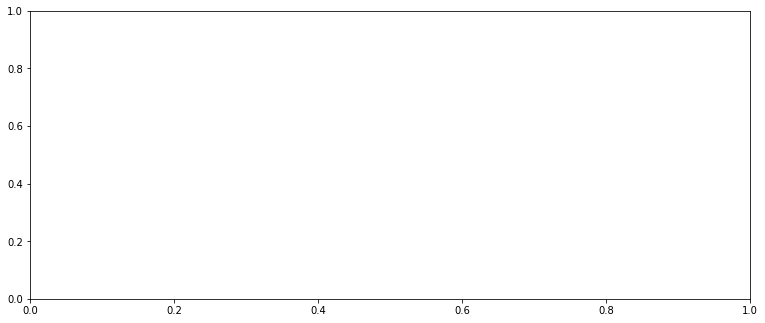

In [58]:
line_data = round(solar_data.groupby('month', as_index=False)['day_power'].mean(),0)

fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(line_data['month'], line_data['day_power'], label='Ежедневное накопление', lw=3)

#установка параметров отображения
axes.set_xlabel('Даты')
axes.set_ylabel('кол-во в день')

axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend();

<AxesSubplot:xlabel='month'>

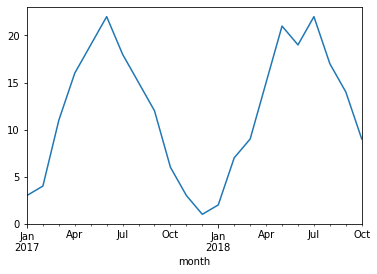

In [60]:
line_data = round(solar_data.groupby('month')['day_power'].mean(),0)
line_data.plot()